## Importing needed moduls, libs

In [1]:
import pandas as pd
import numpy as np
from preprocessing.check_nans import CheckNans
from preprocessing.log_transformation import LogTransformation
from preprocessing.scaling import Scaling
from preprocessing.minmax_scaler import MinMaxScaling
from Models.LinearRegression import LinearRegressionModel
from Models.LassoRegression import LassoRegressionModel
from Models.RidgeRegression import RidgeRegressionModel
from Models.RandomForestRegressor import RandomForestRegModel
from sklearn.model_selection import train_test_split

2024-03-10 18:48:24.400 | INFO     | preprocessing.abstract_prep:<module>:4 - Successfully imported 'abstract_prep' file
2024-03-10 18:48:24.400 | INFO     | preprocessing.check_nans:<module>:6 - Successfully imported 'CheckNans' file
2024-03-10 18:48:24.408 | INFO     | preprocessing.log_transformation:<module>:7 - Successfully imported 'LogTransformation' file
2024-03-10 18:48:24.417 | INFO     | preprocessing.scaling:<module>:7 - Successfully imported 'Scaling' file
2024-03-10 18:48:24.418 | INFO     | preprocessing.minmax_scaler:<module>:7 - Successfully imported 'MinMaxScaler' file


## Preprocessing

In [2]:
df = pd.read_csv("Data/cleaned_data.csv")
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,2,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473
4,181636,339055,1695274,1.8667,9.3334,5.0000,11446,1910,0.1669,0.0630,...,0.6667,0.3571,0.0714,0,1,0,0,1,0,596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,18830,2354,393068,0.1250,20.8746,166.9788,1282,592,0.4618,0.0681,...,1.2500,9.9987,0.0599,0,1,0,0,1,0,411
896,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.9091,0.8333,0.1087,0,1,0,0,1,0,589
897,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,1.0668,0.2500,0.3448,0,1,0,0,1,0,499
898,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,1.1111,5.0002,0.0662,0,1,1,0,1,0,507


In [3]:
df = CheckNans(df).transform()
df

2024-03-10 18:48:24.633 | INFO     | preprocessing.check_nans:transform:15 - CheckNans preprocessing is starting
2024-03-10 18:48:24.641 | INFO     | preprocessing.check_nans:transform:18 - No nans in dataframe


,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,2,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473
4,181636,339055,1695274,1.8667,9.3334,5.0000,11446,1910,0.1669,0.0630,...,0.6667,0.3571,0.0714,0,1,0,0,1,0,596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,18830,2354,393068,0.1250,20.8746,166.9788,1282,592,0.4618,0.0681,...,1.2500,9.9987,0.0599,0,1,0,0,1,0,411
896,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.9091,0.8333,0.1087,0,1,0,0,1,0,589
897,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,1.0668,0.2500,0.3448,0,1,0,0,1,0,499
898,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,1.1111,5.0002,0.0662,0,1,1,0,1,0,507


In [4]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,1.0000,0.0000,0.0625,2,1,0,0,0,0,444
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.9091,0.7692,0.2222,0,1,0,0,1,0,625
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.0000,1.4286,0.0578,2,1,0,0,1,0,469
3,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.9091,0.1163,0.0568,2,1,1,1,1,1,473
4,181636,339055,1695274,1.8667,9.3334,5.0000,11446,1910,0.1669,0.0630,...,0.6667,0.3571,0.0714,0,1,0,0,1,0,596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,18830,2354,393068,0.1250,20.8746,166.9788,1282,592,0.4618,0.0681,...,1.2500,9.9987,0.0599,0,1,0,0,1,0,411
896,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,0.0663,...,0.9091,0.8333,0.1087,0,1,0,0,1,0,589
897,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,0.0047,...,1.0668,0.2500,0.3448,0,1,0,0,1,0,499
898,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,0.0553,...,1.1111,5.0002,0.0662,0,1,1,0,1,0,507


In [5]:
df = Scaling(df).transform()
df

2024-03-10 18:48:24.729 | INFO     | preprocessing.scaling:transform:15 - Scaling preprocessing is starting
2024-03-10 18:48:24.738 | INFO     | preprocessing.scaling:transform:20 - Scaling preprocessing ended


,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,-0.776089,-0.940191,-0.258649,-1.038621,1.684624,-0.308809,-0.659417,-0.496046,0.205435,0.039203,...,0.348734,-0.557241,-0.426584,1.548644,0.245093,-0.553390,-0.454350,-11.294752,-0.416417,-2.234096
1,-0.390283,-0.733901,-0.486944,-0.739305,-0.333355,-0.152000,-0.135180,-0.661346,-1.830147,0.540088,...,-0.199584,-0.083924,-0.297272,-0.743757,0.245093,-0.553390,-0.454350,0.088537,-0.416417,0.596843
2,-0.796764,-0.891231,-0.255952,-0.861331,1.904907,1.321626,-0.757087,-0.512894,1.233379,-0.483225,...,0.348734,0.321829,-0.430390,1.548644,0.245093,-0.553390,-0.454350,0.088537,-0.416417,-1.843083
3,0.249780,1.712319,1.708888,0.941504,1.684624,-0.250114,-0.647542,-0.619525,-1.222264,-1.134913,...,-0.199584,-0.485677,-0.431199,1.548644,0.245093,1.807043,2.200944,0.088537,2.401441,-1.780520
4,0.528131,-0.173156,0.966797,-0.565839,0.554979,-0.045323,0.615752,-0.304783,-1.204920,0.206165,...,-1.661768,-0.337504,-0.419378,-0.743757,0.245093,-0.553390,-0.454350,0.088537,-0.416417,0.143267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-0.903015,-0.934866,-0.405365,-1.006962,2.510618,11.186012,-0.740408,-0.566011,0.042572,0.343504,...,1.856762,5.595329,-0.428689,-0.743757,0.245093,-0.553390,-0.454350,0.088537,-0.416417,-2.750235
896,-0.352958,-0.739290,-0.102137,-0.762327,0.390664,0.139581,-0.190953,-0.299630,-0.394410,0.295031,...,-0.199584,-0.044481,-0.389175,-0.743757,0.245093,-0.553390,-0.454350,0.088537,-0.416417,0.033784
897,-1.068540,-0.844207,-0.787137,-0.218554,0.361045,-0.341744,-0.911462,-0.683346,1.802767,-1.363812,...,0.751679,-0.403407,-0.198000,-0.743757,0.245093,-0.553390,-0.454350,0.088537,-0.416417,-1.373866
898,-0.751985,-0.922088,-0.182911,-0.982344,1.816404,4.843284,-0.645541,-0.431433,0.786668,-0.001191,...,1.018902,2.519567,-0.423588,-0.743757,0.245093,1.807043,-0.454350,0.088537,-0.416417,-1.248742


<Axes: >

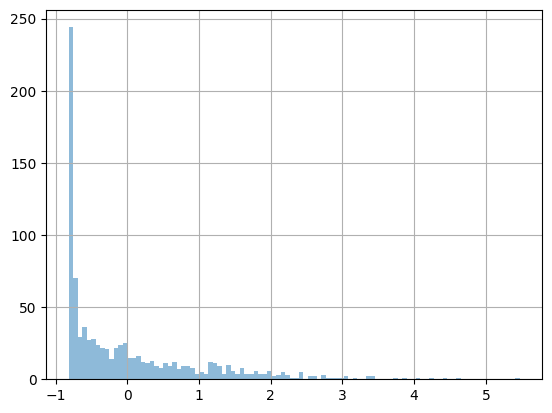

In [6]:
df["DEBT"].hist(bins=100, alpha=0.5, label="DEBT")

In [7]:
df = MinMaxScaling(df).transform()
df

2024-03-10 18:48:25.883 | INFO     | preprocessing.minmax_scaler:transform:15 - MinMaxScaler preprocessing is starting
2024-03-10 18:48:25.892 | INFO     | preprocessing.minmax_scaler:transform:20 - MinMaxScaler preprocessing ended


,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,0.050248,0.000000,0.089184,0.000000,0.432425,0.007187,0.043671,0.023674,0.472739,0.215062,...,0.249944,0.000000,0.006247,1.0,1.0,0.0,0.0,0.0,0.0,0.288
1,0.116536,0.031316,0.052885,0.073353,0.110563,0.020730,0.134505,0.002781,0.018048,0.289972,...,0.181777,0.076844,0.022208,0.0,1.0,0.0,0.0,1.0,0.0,0.650
2,0.046696,0.007432,0.089613,0.043448,0.467560,0.148008,0.026748,0.021544,0.702353,0.136931,...,0.249944,0.142719,0.005777,1.0,1.0,0.0,0.0,1.0,0.0,0.338
3,0.226510,0.402662,0.402024,0.485265,0.432425,0.012256,0.045729,0.008067,0.153832,0.039468,...,0.181777,0.011618,0.005677,1.0,1.0,1.0,1.0,1.0,1.0,0.346
4,0.274336,0.116439,0.284031,0.115863,0.252250,0.029944,0.264617,0.047848,0.157706,0.240032,...,0.000000,0.035675,0.007136,0.0,1.0,0.0,0.0,1.0,0.0,0.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.028440,0.000808,0.065856,0.007759,0.564169,1.000000,0.029638,0.014830,0.436360,0.260572,...,0.437420,0.998881,0.005987,0.0,1.0,0.0,0.0,1.0,0.0,0.222
896,0.122949,0.030498,0.114069,0.067711,0.226042,0.045914,0.124841,0.048499,0.338751,0.253323,...,0.181777,0.083248,0.010864,0.0,1.0,0.0,0.0,1.0,0.0,0.578
897,0.000000,0.014571,0.005154,0.200972,0.221318,0.004342,0.000000,0.000000,0.829538,0.005236,...,0.300037,0.024975,0.034462,0.0,1.0,0.0,0.0,1.0,0.0,0.398
898,0.054390,0.002748,0.101226,0.013792,0.453444,0.452175,0.046076,0.031840,0.602570,0.209021,...,0.333258,0.499525,0.006616,0.0,1.0,1.0,0.0,1.0,0.0,0.414


## LinearRegression

### With selected_features_5

In [8]:
features_5 = pd.read_json("Data/selected_features_5.json")[0]

In [9]:
features_5

0       R_EDUCATION_INCOME
1          R_ENTERTAINMENT
2       R_EXPENDITURE_DEBT
3            R_DEBT_INCOME
4             CAT_GAMBLING
5               R_TAX_DEBT
6            R_EXPENDITURE
7         R_UTILITIES_DEBT
8                   INCOME
9     R_ENTERTAINMENT_DEBT
10       R_GAMBLING_INCOME
11          R_DEBT_SAVINGS
12                    DEBT
Name: 0, dtype: object

In [10]:
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,0.050248,0.000000,0.089184,0.000000,0.432425,0.007187,0.043671,0.023674,0.472739,0.215062,...,0.249944,0.000000,0.006247,1.0,1.0,0.0,0.0,0.0,0.0,0.288
1,0.116536,0.031316,0.052885,0.073353,0.110563,0.020730,0.134505,0.002781,0.018048,0.289972,...,0.181777,0.076844,0.022208,0.0,1.0,0.0,0.0,1.0,0.0,0.650
2,0.046696,0.007432,0.089613,0.043448,0.467560,0.148008,0.026748,0.021544,0.702353,0.136931,...,0.249944,0.142719,0.005777,1.0,1.0,0.0,0.0,1.0,0.0,0.338
3,0.226510,0.402662,0.402024,0.485265,0.432425,0.012256,0.045729,0.008067,0.153832,0.039468,...,0.181777,0.011618,0.005677,1.0,1.0,1.0,1.0,1.0,1.0,0.346
4,0.274336,0.116439,0.284031,0.115863,0.252250,0.029944,0.264617,0.047848,0.157706,0.240032,...,0.000000,0.035675,0.007136,0.0,1.0,0.0,0.0,1.0,0.0,0.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.028440,0.000808,0.065856,0.007759,0.564169,1.000000,0.029638,0.014830,0.436360,0.260572,...,0.437420,0.998881,0.005987,0.0,1.0,0.0,0.0,1.0,0.0,0.222
896,0.122949,0.030498,0.114069,0.067711,0.226042,0.045914,0.124841,0.048499,0.338751,0.253323,...,0.181777,0.083248,0.010864,0.0,1.0,0.0,0.0,1.0,0.0,0.578
897,0.000000,0.014571,0.005154,0.200972,0.221318,0.004342,0.000000,0.000000,0.829538,0.005236,...,0.300037,0.024975,0.034462,0.0,1.0,0.0,0.0,1.0,0.0,0.398
898,0.054390,0.002748,0.101226,0.013792,0.453444,0.452175,0.046076,0.031840,0.602570,0.209021,...,0.333258,0.499525,0.006616,0.0,1.0,1.0,0.0,1.0,0.0,0.414


In [11]:
df_with_5 = df[features_5]

In [12]:
df_with_5

,R_EDUCATION_INCOME,R_ENTERTAINMENT,R_EXPENDITURE_DEBT,R_DEBT_INCOME,CAT_GAMBLING,R_TAX_DEBT,R_EXPENDITURE,R_UTILITIES_DEBT,INCOME,R_ENTERTAINMENT_DEBT,R_GAMBLING_INCOME,R_DEBT_SAVINGS,DEBT
0,0.000000,0.293363,0.006247,0.432425,1.0,0.000000,0.711912,0.001717,0.050248,0.002075,0.191934,0.007187,0.089184
1,0.000000,0.287582,0.022208,0.110563,0.0,0.025080,0.320078,0.009089,0.116536,0.019536,0.000000,0.020730,0.052885
2,0.000000,0.573152,0.005777,0.467560,1.0,0.000000,0.694415,0.001616,0.046696,0.002433,0.188533,0.148008,0.089613
3,0.000000,0.314731,0.005677,0.432425,1.0,0.006369,0.501060,0.004343,0.226510,0.000787,0.056365,0.012256,0.402024
4,0.059034,0.303167,0.007136,0.252250,0.0,0.018710,0.483740,0.006766,0.274336,0.004616,0.000000,0.029944,0.284031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.000000,0.307190,0.005987,0.564169,0.0,0.000000,0.654472,0.002222,0.028440,0.002540,0.000000,1.000000,0.065856
896,0.000000,0.623680,0.010864,0.226042,0.0,0.016720,0.438848,0.005150,0.122949,0.015171,0.000000,0.045914,0.114069
897,0.000000,0.569382,0.034462,0.221318,0.0,0.000000,1.000000,0.008786,0.000000,0.000000,0.092323,0.004342,0.005154
898,0.503961,0.303419,0.006616,0.453444,0.0,0.000000,0.836515,0.001818,0.054390,0.002111,0.000000,0.452175,0.101226


In [13]:
y = df["CREDIT_SCORE"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_with_5, y, test_size=0.25, random_state=63)

In [15]:
linreg = LinearRegressionModel("Linreg")
linreg

In [16]:
linreg.trained

2024-03-10 18:48:26.127 | ERROR    | Models.abstract_model:trained:23 - Linreg is not trained yet


False

In [17]:
linreg.train(X_train, y_train)

2024-03-10 18:48:26.143 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


In [18]:
linreg.predict(X_test)

array([0.64158416, 0.50801868, 0.55584376, 0.38194086, 0.67993441,
       0.73745436, 0.67724302, 0.65721676, 0.68886098, 0.69321959,
       0.63924612, 0.50982294, 0.51928932, 0.70474028, 0.46618222,
       0.60772481, 0.67540584, 0.6592941 , 0.60871533, 0.44184125,
       0.56744533, 0.68882356, 0.66458362, 0.52320942, 0.66354004,
       0.63867855, 0.50951685, 0.54911102, 0.5100055 , 0.58387838,
       0.48686978, 0.63463507, 0.46560846, 0.48070408, 0.53993938,
       0.6839087 , 0.67506132, 0.59460883, 0.68728622, 0.68417005,
       0.65674079, 0.5937488 , 0.59730316, 0.62522031, 0.6603127 ,
       0.49191885, 0.60730473, 0.44352217, 0.73220947, 0.71756165,
       0.6442556 , 0.51932936, 0.60301516, 0.25233813, 0.51036073,
       0.6746049 , 0.46664636, 0.51214115, 0.59661377, 0.58336973,
       0.46887072, 0.41820863, 0.52076427, 0.4753483 , 0.52673165,
       0.5042844 , 0.53810176, 0.05893866, 0.57300976, 0.69780329,
       0.62415392, 0.63401445, 0.54580969, 0.58114044, 0.35080

In [19]:
linreg.score(y_test)

0.8002290542977315

### With selected_features_10

In [20]:
features_10 = pd.read_json("Data/selected_features_10.json")[0]
features_10


0          R_ENTERTAINMENT
1          CAT_CREDIT_CARD
2          R_CLOTHING_DEBT
3            R_HEALTH_DEBT
4     R_ENTERTAINMENT_DEBT
5       R_EDUCATION_INCOME
6            R_DEBT_INCOME
7              R_GROCERIES
8     R_EXPENDITURE_INCOME
9               R_TAX_DEBT
10                    DEBT
11       R_GAMBLING_INCOME
12                  INCOME
13      R_EXPENDITURE_DEBT
14                T_TAX_12
15              T_FINES_12
16           R_EXPENDITURE
17          R_DEBT_SAVINGS
18            CAT_GAMBLING
19               T_FINES_6
20        R_GROCERIES_DEBT
21        R_UTILITIES_DEBT
Name: 0, dtype: object

In [21]:
df_with_10 = df[features_10]
df_with_10

,R_ENTERTAINMENT,CAT_CREDIT_CARD,R_CLOTHING_DEBT,R_HEALTH_DEBT,R_ENTERTAINMENT_DEBT,R_EDUCATION_INCOME,R_DEBT_INCOME,R_GROCERIES,R_EXPENDITURE_INCOME,R_TAX_DEBT,...,INCOME,R_EXPENDITURE_DEBT,T_TAX_12,T_FINES_12,R_EXPENDITURE,R_DEBT_SAVINGS,CAT_GAMBLING,T_FINES_6,R_GROCERIES_DEBT,R_UTILITIES_DEBT
0,0.293363,0.0,0.002762,0.000295,0.002075,0.000000,0.432425,0.783925,0.249944,0.000000,...,0.050248,0.006247,0.000000,0.000000,0.711912,0.007187,1.0,0.000000,0.003253,0.001717
1,0.287582,0.0,0.014518,0.000738,0.019536,0.000000,0.110563,0.494259,0.181777,0.025080,...,0.116536,0.022208,0.115970,0.000000,0.320078,0.020730,0.0,0.000000,0.005935,0.009089
2,0.573152,0.0,0.001736,0.000837,0.002433,0.000000,0.467560,0.758090,0.249944,0.000000,...,0.046696,0.005777,0.000000,0.025334,0.694415,0.148008,1.0,0.033272,0.002896,0.001616
3,0.314731,1.0,0.000631,0.001526,0.000787,0.000000,0.432425,0.454593,0.181777,0.006369,...,0.226510,0.005677,0.231646,0.000000,0.501060,0.012256,1.0,0.000000,0.005184,0.004343
4,0.303167,0.0,0.005365,0.002166,0.004616,0.059034,0.252250,0.714509,0.000000,0.018710,...,0.274336,0.007136,0.463704,0.000000,0.483740,0.029944,0.0,0.000000,0.005220,0.006766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.307190,0.0,0.002604,0.000886,0.002540,0.000000,0.564169,0.646399,0.437420,0.000000,...,0.028440,0.005987,0.000000,0.000000,0.654472,1.000000,0.0,0.000000,0.003611,0.002222
896,0.623680,0.0,0.006233,0.001280,0.015171,0.000000,0.226042,0.634656,0.181777,0.016720,...,0.122949,0.010864,0.169870,0.000000,0.438848,0.045914,0.0,0.000000,0.003682,0.005150
897,0.569382,0.0,0.000000,0.002363,0.000000,0.000000,0.221318,0.783142,0.300037,0.000000,...,0.000000,0.034462,0.000000,0.000000,1.000000,0.004342,0.0,0.000000,0.007079,0.008786
898,0.303419,1.0,0.002604,0.000689,0.002111,0.503961,0.453444,0.845251,0.333258,0.000000,...,0.054390,0.006616,0.000000,0.000000,0.836515,0.452175,0.0,0.000000,0.003575,0.001818


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_with_10, y, test_size=0.25, random_state=63)

In [23]:
linreg.train(X_train, y_train)

2024-03-10 18:48:26.268 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


In [24]:
linreg.predict(X_test)


array([0.65161795, 0.5085092 , 0.56155328, 0.38472948, 0.68226281,
       0.73201305, 0.67862199, 0.6410855 , 0.69577534, 0.69557908,
       0.64187393, 0.51012893, 0.5191979 , 0.67870692, 0.46842535,
       0.60538559, 0.65794821, 0.65760577, 0.6081455 , 0.44224368,
       0.56130371, 0.68556511, 0.66625763, 0.52342671, 0.66540928,
       0.64360723, 0.50808682, 0.55579893, 0.49811763, 0.5876632 ,
       0.48384833, 0.64025039, 0.4656657 , 0.48353482, 0.54601403,
       0.66304717, 0.68145344, 0.5951666 , 0.6866573 , 0.68648109,
       0.66197542, 0.5923903 , 0.60191248, 0.62336845, 0.66045296,
       0.4954118 , 0.61279397, 0.43951543, 0.73804989, 0.71718025,
       0.64507292, 0.52788922, 0.59995808, 0.25431422, 0.4991153 ,
       0.67612626, 0.46518133, 0.51782342, 0.60689927, 0.59621221,
       0.46612824, 0.42290568, 0.52118224, 0.47849687, 0.51538552,
       0.50516823, 0.53327895, 0.05118997, 0.57359803, 0.68998465,
       0.62342556, 0.63324726, 0.54356438, 0.58593623, 0.34717

In [25]:
linreg.score(y_test)

0.7950165291153991

### With selected_features_15

In [26]:
features_15 = pd.read_json("Data/selected_features_15.json")[0]
features_15

0          R_ENTERTAINMENT
1          CAT_CREDIT_CARD
2          R_CLOTHING_DEBT
3               R_GAMBLING
4             R_TAX_INCOME
5            R_HEALTH_DEBT
6            R_TAX_SAVINGS
7     R_ENTERTAINMENT_DEBT
8       R_EDUCATION_INCOME
9                    R_TAX
10           R_DEBT_INCOME
11             R_GROCERIES
12        T_EXPENDITURE_12
13     R_UTILITIES_SAVINGS
14            T_GAMBLING_6
15    R_EXPENDITURE_INCOME
16              R_TAX_DEBT
17                    DEBT
18       R_GAMBLING_INCOME
19       T_ENTERTAINMENT_6
20                  INCOME
21                R_TRAVEL
22      R_EXPENDITURE_DEBT
23             T_TRAVEL_12
24           T_CLOTHING_12
25                T_TAX_12
26         T_EXPENDITURE_6
27          R_HOUSING_DEBT
28        R_SAVINGS_INCOME
29              T_FINES_12
30           R_EXPENDITURE
31          R_DEBT_SAVINGS
32            CAT_GAMBLING
33               T_FINES_6
34        R_GROCERIES_DEBT
35        R_UTILITIES_DEBT
36           R_TRAVEL_DEBT
N

In [27]:
df_with_15 = df[features_15]
df_with_15

,R_ENTERTAINMENT,CAT_CREDIT_CARD,R_CLOTHING_DEBT,R_GAMBLING,R_TAX_INCOME,R_HEALTH_DEBT,R_TAX_SAVINGS,R_ENTERTAINMENT_DEBT,R_EDUCATION_INCOME,R_TAX,...,R_HOUSING_DEBT,R_SAVINGS_INCOME,T_FINES_12,R_EXPENDITURE,R_DEBT_SAVINGS,CAT_GAMBLING,T_FINES_6,R_GROCERIES_DEBT,R_UTILITIES_DEBT,R_TRAVEL_DEBT
0,0.293363,0.0,0.002762,0.355319,0.000000,0.000295,0.169429,0.002075,0.000000,0.595138,...,0.001651,0.000000,0.000000,0.711912,0.007187,1.0,0.000000,0.003253,0.001717,0.004579
1,0.287582,0.0,0.014518,0.586304,0.298368,0.000738,0.132597,0.019536,0.000000,0.500900,...,0.015272,0.073353,0.000000,0.320078,0.020730,0.0,0.000000,0.005935,0.009089,0.008736
2,0.573152,0.0,0.001736,0.485265,0.000000,0.000837,0.000000,0.002433,0.000000,0.548319,...,0.001533,0.043448,0.025334,0.694415,0.148008,1.0,0.033272,0.002896,0.001616,0.004088
3,0.314731,1.0,0.000631,0.538310,0.306527,0.001526,0.020872,0.000787,0.000000,0.364046,...,0.005248,0.485265,0.000000,0.501060,0.012256,1.0,0.000000,0.005184,0.004343,0.001595
4,0.303167,0.0,0.005365,0.532697,0.505828,0.002166,0.143033,0.004616,0.059034,0.200180,...,0.005336,0.115863,0.000000,0.483740,0.029944,0.0,0.000000,0.005220,0.006766,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.307190,0.0,0.002604,0.557395,0.000000,0.000886,0.000000,0.002540,0.000000,0.532113,...,0.002064,0.007759,0.000000,0.654472,1.000000,0.0,0.000000,0.003611,0.002222,0.003870
896,0.623680,0.0,0.006233,0.364580,0.413753,0.001280,0.199509,0.015171,0.000000,0.499400,...,0.000000,0.067711,0.000000,0.438848,0.045914,0.0,0.000000,0.003682,0.005150,0.004933
897,0.569382,0.0,0.000000,0.706988,0.403263,0.002363,0.000000,0.000000,0.000000,0.484394,...,0.007489,0.200972,0.000000,1.000000,0.004342,0.0,0.000000,0.007079,0.008786,0.039004
898,0.303419,1.0,0.002604,0.680887,0.000000,0.000689,0.000000,0.002111,0.503961,0.473589,...,0.001739,0.013792,0.000000,0.836515,0.452175,0.0,0.000000,0.003575,0.001818,0.002985


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_with_15, y, test_size=0.25, random_state=63)

In [29]:
linreg.train(X_train, y_train)
linreg.predict(X_test)
linreg.score(y_test)

2024-03-10 18:48:26.396 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


0.7927841906318851

## LassoRegression

### With selected_features_5

In [30]:
LassoModel = LassoRegressionModel("LassoModel")

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_with_5, y, test_size=0.25, random_state=63)

In [32]:
LassoModel.train(X_train, y_train)
LassoModel.predict(X_test)
LassoModel.score(y_test)

2024-03-10 18:48:26.429 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


-0.005613658385709375

### With selected_features_10

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_with_10, y, test_size=0.25, random_state=63)

In [34]:
LassoModel.train(X_train, y_train)
LassoModel.predict(X_test)
LassoModel.score(y_test)

2024-03-10 18:48:26.468 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


-0.005613658385709375

### With selected_features_15

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_with_15, y, test_size=0.25, random_state=63)

In [36]:
LassoModel.train(X_train, y_train)
LassoModel.predict(X_test)
LassoModel.score(y_test)

2024-03-10 18:48:26.508 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


-0.005613658385709375

## RidgeRegression

### With selected_features_5

In [37]:
RidgeModel = RidgeRegressionModel("RidgeModel")

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_with_5, y, test_size=0.25, random_state=63)

In [39]:
RidgeModel.train(X_train, y_train)
RidgeModel.predict(X_test)
RidgeModel.score(y_test)

2024-03-10 18:48:26.559 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


0.7996339336803029

### With selected_features_10

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_with_10, y, test_size=0.25, random_state=63)

In [41]:
RidgeModel.train(X_train, y_train)
RidgeModel.predict(X_test)
RidgeModel.score(y_test)

2024-03-10 18:48:26.611 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


0.7945360576988247

### With selected_features_15

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_with_15, y, test_size=0.25, random_state=63)

In [43]:
RidgeModel.train(X_train, y_train)
RidgeModel.predict(X_test)
RidgeModel.score(y_test)

2024-03-10 18:48:26.648 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


0.799285459271546

## RandomForestRegressor

### With selected_features_5

In [48]:
RForestModel = RandomForestRegModel("RandomForestModel")

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_with_5, y, test_size=0.25, random_state=63)

In [50]:
RForestModel.train(X_train, y_train)
RForestModel.predict(X_test)
RForestModel.score(y_test)

2024-03-10 18:48:42.784 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


0.7482176545846553

### With selected_features_10

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_with_10, y, test_size=0.25, random_state=63)

In [52]:
RForestModel.train(X_train, y_train)
RForestModel.predict(X_test)
RForestModel.score(y_test)

2024-03-10 18:49:25.083 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


0.7308115802333877

### With selected_features_15

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_with_15, y, test_size=0.25, random_state=63)

In [54]:
RForestModel.train(X_train, y_train)
RForestModel.predict(X_test)
RForestModel.score(y_test)

2024-03-10 18:50:07.096 | INFO     | Models.abstract_model:train:30 - Model was trained successfully: status:True


0.7319993180582567